In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [211]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [212]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


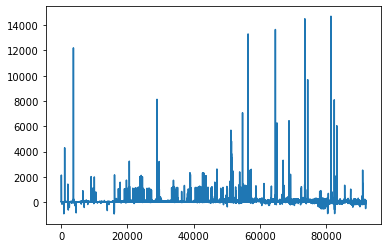

In [214]:
plt.plot(df["ElecPrice"])

In [150]:
df.shape

(92016, 5)

In [151]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [152]:
df.FullDate.dtype

dtype('O')

In [153]:
#convert the FullDate column to DateTime
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [154]:
df.FullDate.dtype

dtype('<M8[ns]')

In [155]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [156]:
#df.set_index('FullDate', inplace = True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [162]:
df1 = df.drop(columns=['Tmax', 'SysLoad','GasPrice'])
df1.head()

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [163]:
df1.head()

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [164]:
df1.set_index('FullDate', inplace = True)

In [215]:
df1.head()

,ElecPrice
FullDate,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030


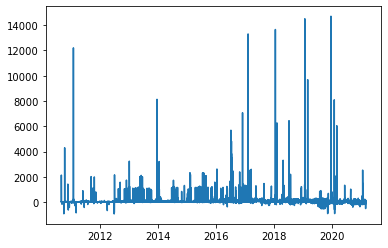

In [216]:
plt.plot(df1["ElecPrice"])

In [220]:
df1_daily

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [218]:
#test for sationarity

def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(
        df_test[0:4],
        index = [
            "Test statistics",
            "p-value",
            "Number of lags used",
            "Number of observations used"
        ]
    )
    
    print(df_output)

In [221]:
stationarity_test(df1)

Test statistics                  -31.952976
p-value                            0.000000
Number of lags used               53.000000
Number of observations used    91962.000000
dtype: float64


In [166]:
df1_daily = df1.resample('D').sum()

In [167]:
df1_daily.head()

,ElecPrice
FullDate,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


In [168]:
df1_daily = df1_daily.reset_index()

In [169]:
df1_daily = df1_daily.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df1_daily.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [170]:
df1_daily.shape

(3834, 2)

In [171]:
df1_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3834 non-null   datetime64[ns]
 1   y       3834 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.0 KB


In [172]:
cutoff = 2757

df1_daily_train = df1_daily.iloc[:cutoff]
df1_daily_test = df1_daily.iloc[cutoff:]

In [173]:
df1_daily_train.shape

(2757, 2)

In [174]:
df1_daily_test.shape

(1077, 2)

In [175]:
#Building the model
from prophet import Prophet

m = Prophet()
m.fit(df1_daily_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [115]:
#predict for the next 10 months
future = m.make_future_dataframe(periods=1077, freq='D')
forecast = m.predict(future)
forecast.head()

C:\Users\User\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,840.062483,-1631.841082,3357.020541,840.062483,840.062483,143.884000,143.884000,143.884000,159.373437,159.373437,159.373437,-15.489437,-15.489437,-15.489437,0.0,0.0,0.0,983.946484
1,2010-09-02,840.040783,-1222.310861,3454.120388,840.040783,840.040783,224.272698,224.272698,224.272698,257.126848,257.126848,257.126848,-32.854150,-32.854150,-32.854150,0.0,0.0,0.0,1064.313481
2,2010-09-03,840.019083,-1486.393595,3424.890350,840.019083,840.019083,-0.678461,-0.678461,-0.678461,50.279546,50.279546,50.279546,-50.958007,-50.958007,-50.958007,0.0,0.0,0.0,839.340621
3,2010-09-04,839.997383,-1947.674673,2876.454123,839.997383,839.997383,-340.920903,-340.920903,-340.920903,-271.454162,-271.454162,-271.454162,-69.466741,-69.466741,-69.466741,0.0,0.0,0.0,499.076480
4,2010-09-05,839.975682,-2134.763544,2860.479083,839.975682,839.975682,-430.817505,-430.817505,-430.817505,-342.743011,-342.743011,-342.743011,-88.074494,-88.074494,-88.074494,0.0,0.0,0.0,409.158177


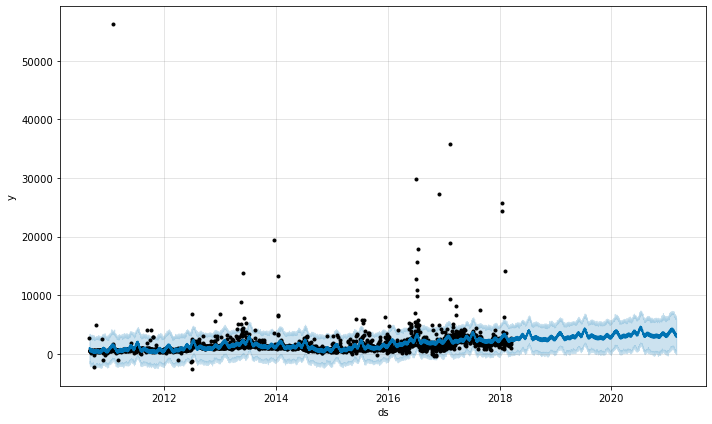

In [116]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

m.plot(forecast)
plt.show()

In [117]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-09-01,983.946484,-1631.841082,3357.020541
1,2010-09-02,1064.313481,-1222.310861,3454.120388
2,2010-09-03,839.340621,-1486.393595,3424.890350
3,2010-09-04,499.076480,-1947.674673,2876.454123
4,2010-09-05,409.158177,-2134.763544,2860.479083


In [ ]:
m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [222]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [224]:
# MAPE Value
round(mean_absolute_percentage_error(df1_daily_test['y'], forecast['yhat'][-1077:]),2)

546.82

In [225]:
# RMSE Calculation
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df1_daily_test['y'], forecast['yhat'][-1077:]))
print(round(rmse,2))

3212.28


In [176]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [180]:
df.set_index(df.FullDate, inplace = True)

In [181]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,,
2010-09-01 00:00:00,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [182]:
df_daily = df.resample('D').sum()

In [183]:
df_daily = df_daily.reset_index()

In [184]:
df_daily

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [185]:
df_daily = df_daily.rename(columns={"FullDate": "ds" ,"ElecPrice": "y", "SysLoad": "add1", "Tmax": "add2","GasPrice": "add3"})

In [186]:
df_cutoff = 2757

df_daily_train = df_daily.iloc[:df_cutoff]
df_daily_test = df_daily.iloc[df_cutoff:]

In [189]:
print(df_daily_train.shape)
df_daily_test.shape

(2757, 5)


(1077, 5)

In [190]:
df_daily_train.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [243]:
# Building Model - Prophet & Adding regressors
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [244]:
model.fit(df_daily_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [250]:
future_points = model.make_future_dataframe(periods=1077,freq='M')
future_points['add1'] = df_daily['add1'].values
future_points['add2'] = df_daily['add2'].values
future_points['add3'] = df_daily['add3'].values

predict = model.predict(future_points)

C:\Users\User\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



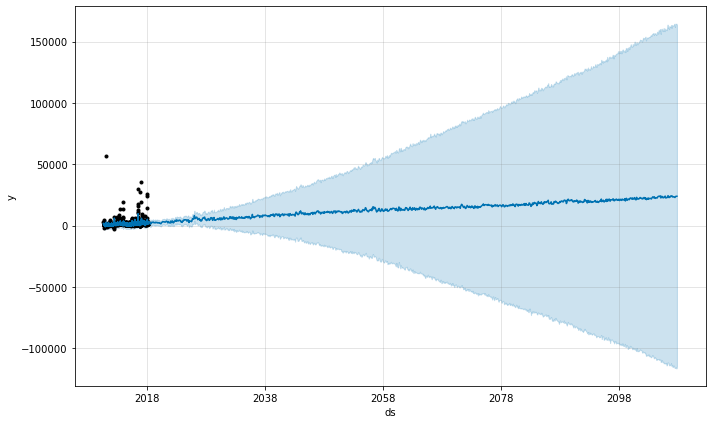

In [251]:
model.plot(predict)
plt.show()

In [252]:
predict.shape

(3834, 31)

In [253]:
# MAPE
mean_absolute_percentage_error( df_daily_test['y'][-df_cutoff:], predict['yhat'][df_cutoff:])

3432.9913084685636

In [254]:
# RMSE
rmse_2 = sqrt(mean_squared_error( df_daily_test['y'][-df_cutoff:], predict['yhat'][df_cutoff:]))
print(rmse_2)

13581.71321116561


In [255]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df1['ElecPrice']) 
print(f'ADF Statistic: {adf_result[0]}') 
print(f'p-value: {adf_result[1]}') 
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -31.95297569955783
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:
   1%: -3.430421110703783
   5%: -2.8615714297867108
   10%: -2.56678672898094


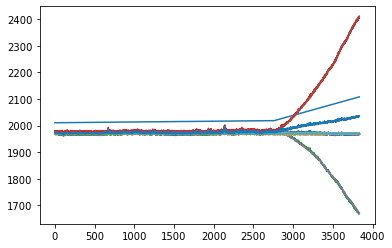

In [235]:
plt.plot(predict);